# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face detection
Task is to predict the boundaries(mask) around the face in a given image.

## Dataset
Faces in images marked with bounding boxes. Have around 500 images with around 1100 faces manually tagged via bounding box.

### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Change current working directory to project folder (1 mark)

In [0]:
import os
project_path = '/content/drive/My Drive/Colab Notebooks/Face_Detection_1/'
os.chdir(path)

In [0]:
# Change current working directory to project folder..
os.chdir(project_path)

In [7]:
ls

images.npy  WIDER_test.zip  WIDER_train.zip


In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

In [0]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224

### Load the "images.npy" file (2 marks)
- This file contains images with details of bounding boxes

In [0]:
import numpy as np
data = np.load("images.npy",allow_pickle = True )

In [13]:
data.shape

(409, 2)

### Check one sample from the loaded "images.npy" file  (2 marks)

image shape h, w, c :  (333, 650, 3)


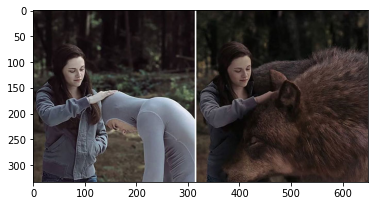

In [14]:
#### Add your code here ####
# Sample - 1
img1 = data[0][0]
img1 = img1[:, :, :3]

print("image shape h, w, c : ", data[0][0].shape )
plt.imshow(img1)
plt.show()

In [15]:
# information about the mask for above image.  
data[0][1]

[{'imageHeight': 333,
  'imageWidth': 650,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.08615384615384615, 'y': 0.3063063063063063},
   {'x': 0.1723076923076923, 'y': 0.45345345345345345}]},
 {'imageHeight': 333,
  'imageWidth': 650,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.583076923076923, 'y': 0.2912912912912913},
   {'x': 0.6584615384615384, 'y': 0.46846846846846846}]}]

#### Checking a sample image with a single face and its ground truth mask....

In [16]:
# image size h, w, c.  
data[10][0].shape 

(337, 600, 3)

In [17]:
data[10][1]

[{'imageHeight': 337,
  'imageWidth': 600,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.48, 'y': 0.10385756676557864},
   {'x': 0.7716666666666666, 'y': 0.6795252225519288}]}]

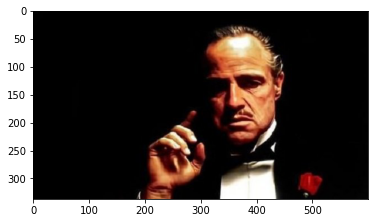

In [18]:
# Original image before resizing. 
plt.imshow(data[10][0]) 

In [0]:
img10 = data[10][0]

In [0]:
img10 = cv2.resize(img10, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
try:
    img10 = img10[:, :, :3]
except:
    print("catch")

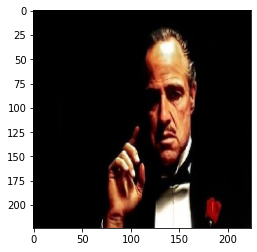

In [21]:
# Showing image after resizing to 224 x 224.
plt.imshow(img10) 

In [0]:
X_t = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
X_t[10] = preprocess_input(np.array(img10, dtype=np.float32))

In [0]:
masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))

In [24]:
masks.shape

(409, 224, 224)

In [0]:
for i in data[10][1]:
    x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
    x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
    y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
    y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
    masks[10][y1:y2, x1:x2] = 1

In [26]:
masks[10].shape

(224, 224)

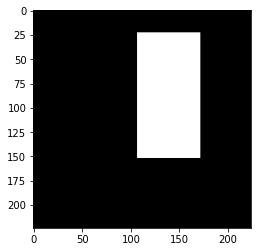

In [27]:
plt.imshow(masks[10], cmap='gray')

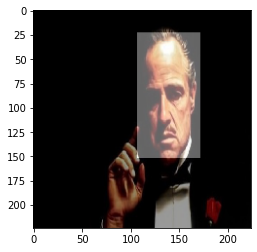

In [28]:
# Checking if the calculated masks are located properly after superimposing
plt.imshow(img10)
plt.imshow(masks[10], alpha=0.4, cmap='gray')

### Set image dimensions   (1 mark)
- Initialize image height, image width with value: 224 

In [0]:
# ALREADY DONE IN THE CODE ABOVE  # 

#IMAGE_WIDTH = 224 #### Add your code here ####
#IMAGE_HEIGHT = 224 #### Add your code here ####

### Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X_train" array
- Masks will be stored in "masks" array

In [0]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X_train = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X_train[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

### Print the shape of X_train and mask array  (1 mark)

In [31]:
#### Add your code here ####
X_train.shape

(409, 224, 224, 3)

In [32]:
#### Add your code here ####
masks.shape

(409, 224, 224)

### Print a sample image and image array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 ...

 [[-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  ...
  [-0.96862745 -0.96862745 -0.96862745]
  [-0.96078432 -0.96078432 -0.96078432]
  [-0.96078432 -0.96078432 -0.96078432]]

 [

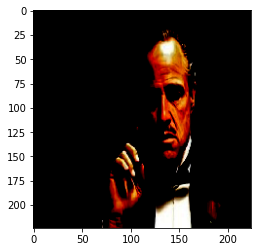

In [33]:
from matplotlib import pyplot
n = 10
print(X_train[n])
pyplot.imshow(X_train[n])

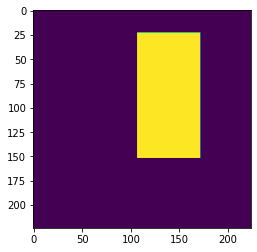

In [34]:
pyplot.imshow(masks[n])

## Create the model (10 marks)
- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False
  - alpha: 1.0
  - weights: "imagenet"
- Add UNET architecture layers
  - This is the trickiest part of the project, you need to research and implement it correctly

In [0]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape, Dropout
from tensorflow.keras.models import Model


def create_model(trainable=True):
    model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, 
                      alpha=1.0, weights='imagenet') #### Add your code here ####
    for layer in model.layers:
        layer.trainable = trainable

    # Add all the UNET layers here
    #### Add your code here ####

    # After peeling the top, the exposed(last) layer from mobileNet is conv_pw_13_relu (ReLU) (None, 7, 7, 1024)
    # we need to upsample from this layer till our mask output that is 224 x 224 x 1
    
    #  conv_pw_13_relu (None, 7, 7, 1024) - Start Layer for UNet
    block_pw_13 = model.get_layer("conv_pw_13_relu").output  
    
    # CONV conv_pw_13_relu (7, 7, 1024) & (3 x 3 ) @ 512 FILTERS --> X(7, 7, 512)
    x = Conv2D(512, kernel_size=3, padding='same', activation='relu')(block_pw_13) 
    
    # conv_pw_11_relu (14, 14, 512)
    block_pw_11 = model.get_layer("conv_pw_11_relu").output
    # UPSAMPLE X(7, 7, 512) --> (14, 14, 512)
    # CONCAT X(14, 14, 512) & conv_pw_11_relu (14, 14, 512) --> X(14, 14, 1024)
    x = Concatenate()([UpSampling2D()(x), block_pw_11])
    # CONV X(14, 14, 1024) & (3 x 3 ) @ 512 FILTERS --> X(14, 14, 512) 
    x = Conv2D(512, kernel_size=3, padding='same', activation='relu')(x)
    
    x = Dropout(0.5)(x)
    
    # conv_pw_5_relu (28, 28, 256)
    block_pw_5 = model.get_layer("conv_pw_5_relu").output
    # UPSAMPLE X(14, 14, 512) --> X(28, 28, 512)
    # CONCAT X(28, 28, 512) & conv_pw_5_relu (28, 28, 256) --> X(28, 28, 768)
    x = Concatenate()([UpSampling2D()(x), block_pw_5])
    # CONV X(28, 28, 768) & (3 x 3 ) @ 512 FILTERS --> X(28, 28, 512)
    x = Conv2D(512, kernel_size=3, padding='same', activation='relu')(x)
    
    x = Dropout(0.5)(x)
    
    # conv_pw_3_relu (56, 56, 128)
    block_pw_3 = model.get_layer("conv_pw_3_relu").output
    # UPSAMPLE X(28, 28, 512) --> X(56, 56, 512)
    # CONCAT  X(56, 56, 512) & conv_pw_3_relu (56, 56, 128) --> X(56, 56, 640)
    x = Concatenate()([UpSampling2D()(x), block_pw_3])
    # CONV X(56, 56, 640) & (3 x 3 ) @ 512 FILTERS --> X(56, 56, 512)
    x = Conv2D(512, kernel_size=3, padding='same', activation='relu')(x)

    x = Dropout(0.5)(x)
    
    # conv_pw_1_relu (112, 112, 64)
    block_pw_1 = model.get_layer("conv_pw_1_relu").output
    # UPSAMPLE X(56, 56, 512) --> X(112, 112, 512)
    # CONCAT X(112, 112, 512) & conv_pw_1_relu (112, 112, 64) --> X(112, 112, 576)
    x = Concatenate()([UpSampling2D()(x), block_pw_1])
    # CONV X(112, 112, 576) & (3 x 3 ) @ 512 FILTERS --> X(112, 112, 512)
    x = Conv2D(512, kernel_size=3, padding='same', activation='relu')(x)
    
    x = Dropout(0.5)(x)
    
    # INPUT LAYER (224, 224, 3)
    block_input_1 = model.input
    # UPSAMPLE X(112, 112, 512) --> X(224, 224, 512)
    # CONCAT X(224, 224, 512) & INPUT LAYER (224, 224, 3) --> X(224, 224, 515)
    x = Concatenate()([UpSampling2D()(x), block_input_1])
    # CONV X(224, 224, 515) & (3 x 3 ) @ 1024 FILTERS --> X(224, 224, 1024)
    x = Conv2D(1024, kernel_size=3, padding='same', activation='relu')(x)
    
    x = Dropout(0.5)(x)
    
    # Do (1x1) CONVOLUTION on X(224, 224, 1024) --> X(224, 224, 1)
    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)
    x = Reshape((IMAGE_HEIGHT, IMAGE_WIDTH, 1))(x)

    return Model(inputs=model.input, outputs=x) #### Add your code here ####

### Call the create_model function

In [38]:
# Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)..
model = create_model()

# Print summary.
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
______________________________________________________________________________________________

### Define dice coefficient function (5 marks)
- Create a function to calculate dice coefficient


In [0]:
def dice_coefficient(y_true, y_pred):
    
    #### Add your code here ####
     numerator = 2 * tf.reduce_sum(y_true * y_pred)
     denominator = tf.reduce_sum(y_true + y_pred)

     #### Add your code here ####
     return numerator / (denominator + tf.keras.backend.epsilon()) 

### Define loss

In [0]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())

### Compile the model (2 marks)
- Complie the model using below parameters
  - loss: use the loss function defined above
  - optimizers: use Adam optimizer
  - metrics: use dice_coefficient function defined above

In [0]:
#### Add your code here ####
from tensorflow.keras.optimizers import Adam
optimizer = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss=loss, optimizer=optimizer, metrics=[dice_coefficient])

### Define checkpoint and earlystopping

In [44]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", period=1)

stop = EarlyStopping(monitor="loss", patience=5, mode="min")

reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

### Fit the model (2 marks)
- Fit the model using below parameters
  - epochs: you can decide
  - batch_size: 1
  - callbacks: checkpoint, reduce_lr, stop

In [0]:
#### Add your code here ####
# Split train and valid.  
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, masks, test_size=0.03, random_state=1)

In [46]:
print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_valid",X_valid.shape)
print("y_valid",y_valid.shape)

X_train (396, 224, 224, 3)
y_train (396, 224, 224)
X_valid (13, 224, 224, 3)
y_valid (13, 224, 224)


In [0]:
EPOCHS = 10
BATCH_SIZE = 1

In [48]:
model.fit(
    x=X_train,
    y=y_train,
    batch_size=BATCH_SIZE,    
    epochs=EPOCHS,
    callbacks=[checkpoint, reduce_lr, stop],
    validation_data=(X_valid, y_valid)
)

Epoch 1/10
396/396 [==============================] - ETA: 0s - loss: 1.1746 - dice_coefficient: 0.4902
Epoch 00001: loss improved from inf to 1.17463, saving model to model-1.17.h5
396/396 [==============================] - 300s 758ms/step - loss: 1.1746 - dice_coefficient: 0.4902 - val_loss: 2.3127 - val_dice_coefficient: 0.4387 - lr: 1.0000e-04
Epoch 2/10
396/396 [==============================] - ETA: 0s - loss: 0.7355 - dice_coefficient: 0.6295
Epoch 00002: loss improved from 1.17463 to 0.73555, saving model to model-0.74.h5
396/396 [==============================] - 298s 752ms/step - loss: 0.7355 - dice_coefficient: 0.6295 - val_loss: 2.3553 - val_dice_coefficient: 0.4570 - lr: 1.0000e-04
Epoch 3/10
396/396 [==============================] - ETA: 0s - loss: 0.5959 - dice_coefficient: 0.6845
Epoch 00003: loss improved from 0.73555 to 0.59585, saving model to model-0.60.h5
396/396 [==============================] - 296s 748ms/step - loss: 0.5959 - dice_coefficient: 0.6845 - val_los

### Get the predicted mask for a sample image   (3 marks)

In [49]:
n = 10
sample_image = X_train[n]
#### Add your code here ####
pred_masks = model.predict(X_valid[0:5], verbose=1)

1/1 [==============================] - 0s 2ms/step


In [50]:
pred_masks.shape

(5, 224, 224, 1)

### Impose the mask on the image (3 marks)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

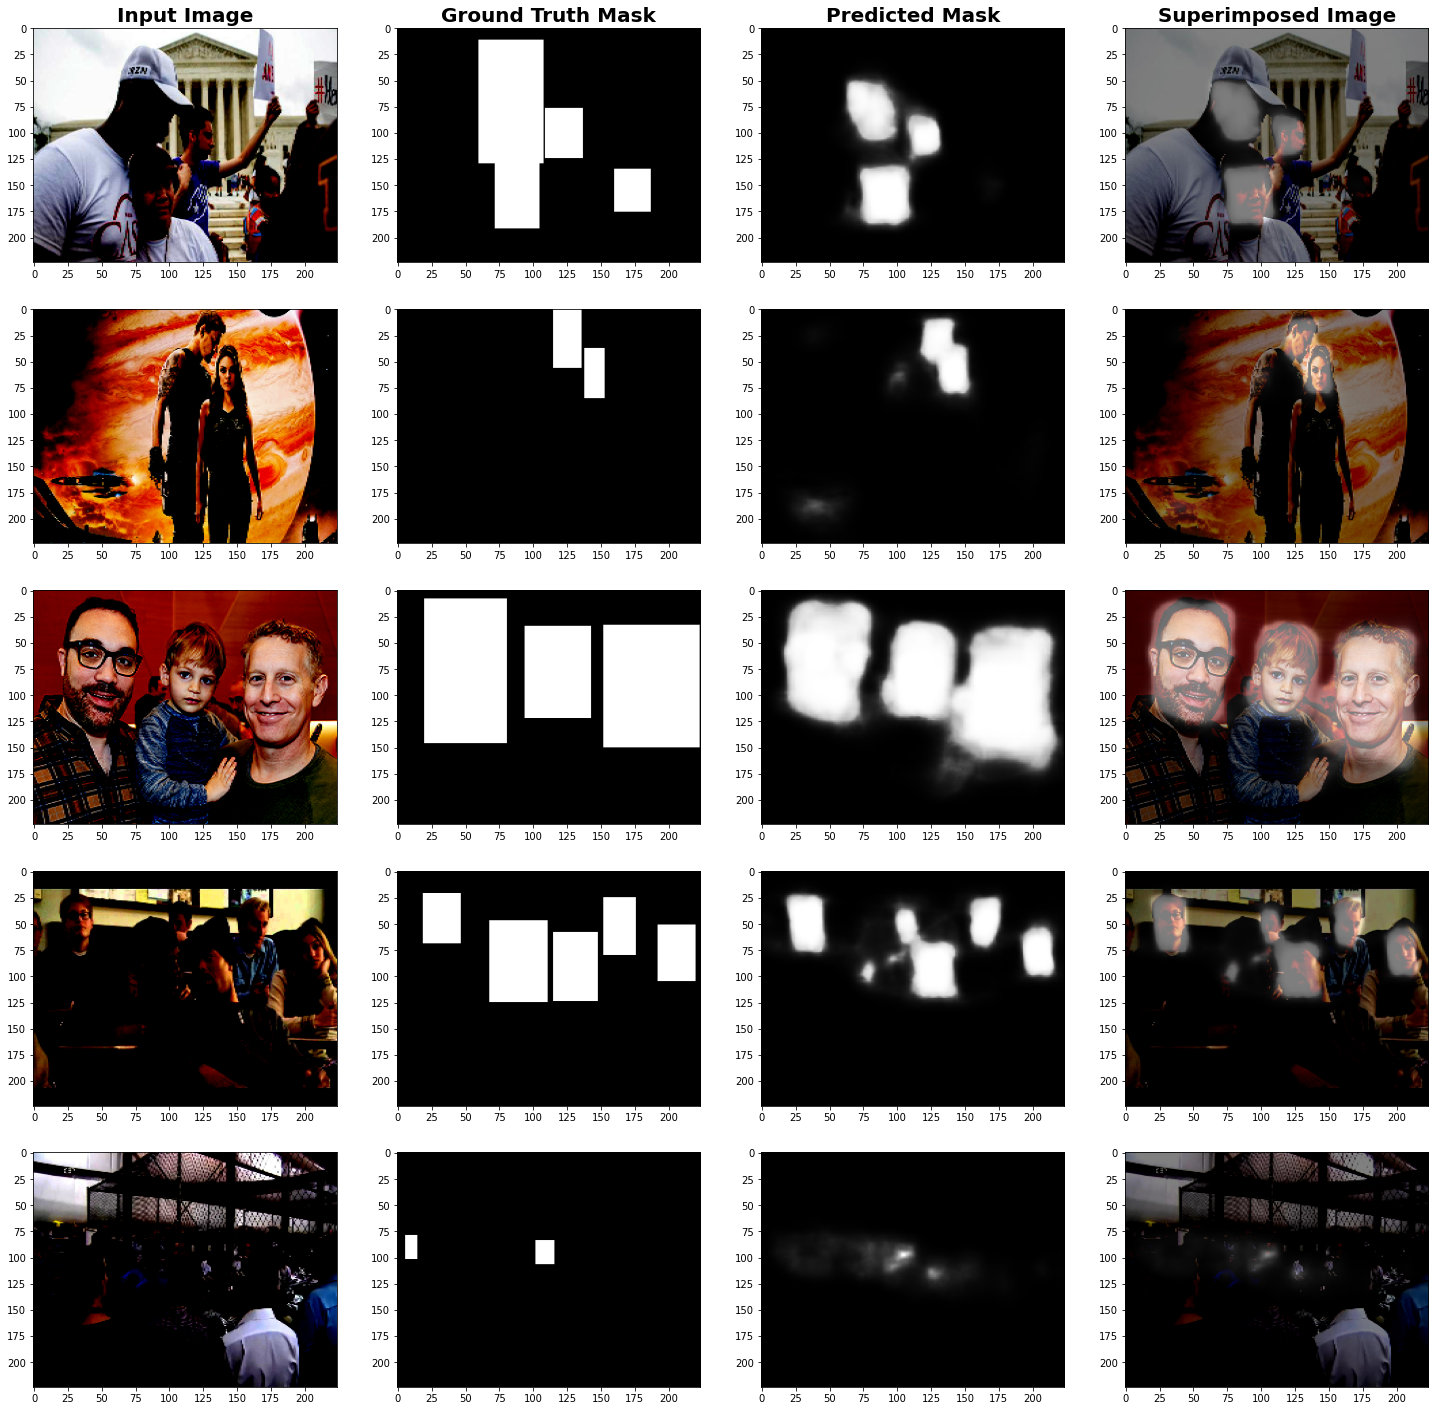

In [51]:
#### Add your code here ####
fig, a = pyplot.subplots(5, 4, figsize=[25, 25])

a[0][0].set_title('Input Image', fontweight="bold", size=20)
a[0][1].set_title('Ground Truth Mask', fontweight="bold", size=20)
a[0][2].set_title('Predicted Mask', fontweight="bold", size=20)
a[0][3].set_title('Superimposed Image', fontweight="bold", size=20)

for i in range(pred_masks.shape[0]):
    a[i][0].imshow(X_valid[i], aspect='auto')
    
    a[i][1].imshow(y_valid[i], cmap='gray', aspect='auto')
     
    predicted_mask = np.reshape(pred_masks[i], (IMAGE_HEIGHT, IMAGE_WIDTH))
    a[i][2].imshow(predicted_mask, cmap = 'gray', aspect='auto') 
    
    a[i][3].imshow(X_valid[i], aspect='auto')
    a[i][3].imshow(predicted_mask, alpha=0.5, cmap='gray', aspect='auto')
        
    
#plt.tight_layout(True)
plt.show()